# 1.Preliminary

## colab에서 google drive 안에 있는 자료를 읽기
https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive/53592023

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


TIMEOUT: ignored

In [0]:
cd '/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis'

In [0]:
ls

 Bulbasaur/  'Pytorch-complete pokemon image dataset.ipynb'   Squirtle/


In [0]:
!cd /
!ls

 Bulbasaur  'Pytorch-complete pokemon image dataset.ipynb'   Squirtle


In [0]:
!cd /drive
!ls
# cd /drive 와 cd / 가 같은 듯
# drive 와 cd 가 같은 듯

/bin/bash: line 0: cd: /drive: No such file or directory
 Bulbasaur  'Pytorch-complete pokemon image dataset.ipynb'   Squirtle


## Pytorch 로 이미지 분석하기
Complete Pokemon Image Dataset <br> 24k+ images, 928 Pokémon

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## colab에서 이미지 읽기
https://stackoverflow.com/questions/49478791/how-can-i-open-images-in-a-google-colaboratory-notebook-cell-from-uploaded-png-f

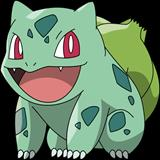

In [0]:
from IPython.display import Image
tmp_path = '/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/Bulbasaur_1.jpg'
Image(tmp_path)

### converting jpg file to png file
png file is easy to treat with numpy and matplotlib

In [0]:
base_path = '/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis'
# sub_path
files = os.listdir(base_path)
print('files', files)
l_sub_path = [sub_path for sub_path in files if len(sub_path.split('.')) == 1]
l_sub_path

files ['Squirtle', 'Bulbasaur', 'Pytorch-complete pokemon image dataset.ipynb']


['Squirtle', 'Bulbasaur']

In [0]:
from PIL import Image
base_path = '/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis'
r_files = os.listdir(base_path)    # base_path 안에 있는 모든 파일과 디렉토리를 
                                   # list에 담아 r_files 에 assign 한다.
                                   # 여기서 디렉토리는 상대경로 형식이다.
                                   # ex) fileA.txt, fileB.txt, folder1, folder2
l_sub_path = [sub_path for sub_path in r_files if len(sub_path.split('.')) == 1]
                                   # r_files에 디렉토리만 뽑아서, l_sub_path 에
                                   # assign 한다.
print('l_sub_path', l_sub_path)

for sub_path in l_sub_path:    # 'Squirtle', 'Bulbasaur' 각 폴더마다 for 문을
                               # 돈다.
    print('sub_path', sub_path)
    full_path = os.path.join(base_path, sub_path)   # 상대경로를 절대경로로 
                                                    # 만든다.
    files = os.listdir(full_path)    
    print('full_path', full_path)
    
    index = 0
    l_n_file = [n_file for n_file in os.listdir(full_path) \
                if len(n_file.split('.')) != 1]    ## n_file : n 은 name
                                                   ## f_file : f 는 full path
                                                   # 디렉토리를 제외시킴으로써,
                                                   # 파일만 l_n_file 에
                                                   # assign 한다.
    for n_file in l_n_file:
        f_file = os.path.join(sub_path, n_file)
        print('n_file', n_file)
        index += 1

        im = Image.open(f_file)
        save_path = os.path.join(full_path, 'png')    # png 는 폴더
        f_save_path = os.path.join(save_path, n_file.split('.')[0]+'.png')
        print('i:{}, path:{}'.format(index, f_save_path))
        im.save(f_save_path)

l_sub_path ['Squirtle', 'Bulbasaur']
sub_path Squirtle
full_path /content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle
n_file Squirtle_1.jpg
i:1, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_1.png
n_file Squirtle_10.jpg
i:2, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_10.png
n_file Squirtle_13.jpg
i:3, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_13.png
n_file Squirtle_17.jpg
i:4, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_17.png
n_file Squirtle_12.jpg
i:5, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_12.png
n_file Squirtle_18.jpg
i:6, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png/Squirtle_18.png
n_file Squirtle_15.jpg
i:7, path:/content/drive/My D

### png image 읽기

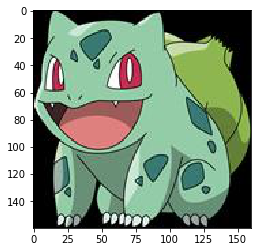

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
base_path = '/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/png'
n_file = 'Bulbasaur_1.png'
f_file = os.path.join(base_path, n_file)
img = Image.open(f_file)
plt.imshow(img)

In [0]:
import matplotlib.image as mpimg
ar_img = mpimg.imread(f_file)
print(ar_img)

[[[0.03137255 0.         0.        ]
  [0.02745098 0.         0.        ]
  [0.01568628 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.03137255 0.         0.        ]
  [0.02745098 0.         0.        ]
  [0.01568628 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.03137255 0.         0.        ]
  [0.02745098 0.         0.        ]
  [0.01568628 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


TypeError: ignored

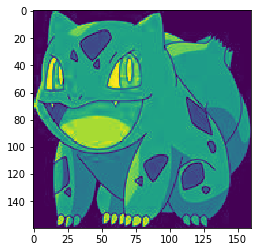

In [0]:
lum_img = ar_img[:,:,0]
plt.imshow(lum_img)

lum_img2 = img[:,:,0]    # 'PngImageFile' object is not subscriptableb
plt.imshow(lum_img2)

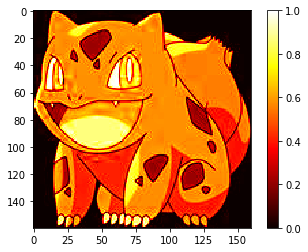

In [0]:
plt.imshow(lum_img, cmap="hot")
plt.colorbar()

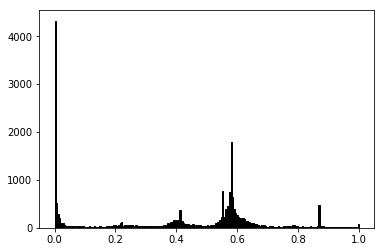

In [0]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

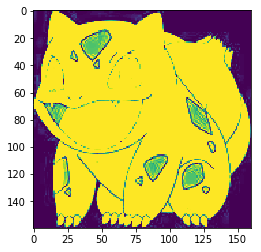

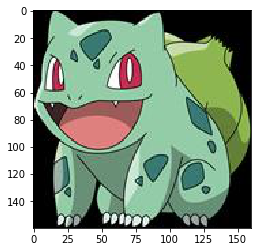

In [0]:
obj_img = plt.imshow(lum_img, clim=(0.0, 0.3))
plt.show()
obj_img2 = plt.imshow(img, clim=(0.0, 0.3))    # 반응이 없는 듯

### 참고. 이미지 다루기 tutorial
https://matplotlib.org/users/image_tutorial.html

# 2.data, model, training

## data preparation

In [0]:
# data
import numpy as np
from PIL import Image
import matplotlib.image as mpimg

base_path = '/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis'
r_files = os.listdir(base_path)
l_sub_path = [sub_path for sub_path in r_files if len(sub_path.split('.')) == 1]
print('l_sub_path', l_sub_path)

x_train = []    # y_train 은 루프 끝난 후 nb_x_train을 이용하여 assign 한다.
nb_x_train = []
for sub_path in l_sub_path:
    print('sub_path', sub_path)
    full_path = os.path.join(base_path, sub_path, 'png')    # .../poketmon-analysis/POKEMON/png
    files = os.listdir(full_path)
    print('full_path', full_path)
    
    index = 0
    nb_x_train.append(len(os.listdir(full_path)))
    l_n_file = [n_file for n_file in os.listdir(full_path) if len(n_file.split('.')) != 1]
    for n_file in l_n_file:
        f_file = os.path.join(full_path, n_file)
        print('n_file', n_file)
        index += 1

        im = Image.open(f_file)
        arr_img = mpimg.imread(f_file)
        # im = ToTensor()(im).unsqueeze(0)    # convert 3 channel to gray scale tensor    # not working well now
        # arr_img = im
        # arr_img = arr_img[:, :, 0] * arr_img[:, :, 1] * arr_img[:, :, 2]    # 3 channel to gray scale
        x_train.append(arr_img)
        print('i:{}, path:{}'.format(index, f_save_path))

# print(im.shape)
print(len(x_train))
# print(torch.FloatTensor([x_train]))
# x_train = np.array(x_train)
x_train = torch.FloatTensor(x_train)    # torch.Size([59, 160, 160, 3])    For arr_img = mpimg.imread(f_file)
                                        # torch.Size([59, 160, 160])       For arr_img = arr_img[:, :, 0] * arr_img[:, :, 1] * arr_img[:, :, 2]
print(x_train.shape)
ratio_tra_test = 0.7
nb_x0 = int(nb_x_train[0] * ratio_tra_test)
nb_x1 = int(nb_x_train[1] * ratio_tra_test)
x_train_ = np.concatenate((x_train[:nb_x0], x_train[nb_x_train[0]:nb_x_train[0]+nb_x1]))
x_test = np.concatenate((x_train[nb_x_train[0]-nb_x0:], x_train[nb_x_train[1]+nb_x1:]))
print(nb_x_train)

y_train = np.concatenate((np.repeat(0, nb_x0), np.repeat(1, nb_x1)))
y_test = np.concatenate((np.repeat(0, nb_x_train[0] - nb_x0), np.repeat(1, nb_x_train[1] - nb_x1)))
print('y_train', y_train)
print('y_test', y_test)
x_train = x_train_



l_sub_path ['Squirtle', 'Bulbasaur']
sub_path Squirtle
full_path /content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Squirtle/png
n_file Squirtle_10.png
i:1, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/png/Bulbasaur_27.png
n_file Squirtle_13.png
i:2, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/png/Bulbasaur_27.png
n_file Squirtle_17.png
i:3, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/png/Bulbasaur_27.png
n_file Squirtle_12.png
i:4, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/png/Bulbasaur_27.png
n_file Squirtle_18.png
i:5, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/png/Bulbasaur_27.png
n_file Squirtle_15.png
i:6, path:/content/drive/My Drive/computing/pytorch_kkj_lessons/poketmon-analysis/Bulbasaur/png/Bulbasaur_27.png
n_file Squirtle_14.png
i:7, path:/

#### data_loader preparation

In [0]:
t_x_train = torch.FloatTensor([[x_case] for x_case in x_train])
print(t_x_train.shape)    # torch.Size([40, 1, 160, 160, 3])
                          # torch.Size([40, 1, 160, 160])
print(len(t_x_train))
print(len(t_x_train[0]))
print(len(t_x_train[0][0]))
print(len(t_x_train[0][0][0]))

print()
t_y_train = torch.FloatTensor(y_train)
print(len(t_y_train))
print(t_y_train.shape)
# print(len(t_y_train[0]))    # error

data_loader = zip(t_x_train, t_y_train)
idx = 0
for x, y in data_loader:
    idx += 1
    print(idx, x.shape, '  ///   ', y.shape, y)
    if idx == 50:
        break

torch.Size([40, 1, 160, 160, 3])
40
1
160
160

40
torch.Size([40])
1 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
2 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
3 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
4 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
5 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
6 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
7 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
8 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
9 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
10 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
11 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
12 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
13 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
14 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
15 t

### dataloader 의 규격에 맞도록 x_train과 y_train의 tensor 차원 조절

In [0]:
print(nb_x_train)
print(x_train.shape)
x_train = x_train[:]
print(len(x_train))
print(len(x_train[0]))
print(len(x_train[0][0]))

# print(arr_img)
print()
print(len(arr_img[0]))
print(len(arr_img[0][0]))
# print('y_train', y_train)

[31, 28]
(40, 160, 160, 3)
40
160
160

160
3


In [0]:
arr_img = x_train[0]

g_img = arr_img[:, :, 0] * arr_img[:, :, 1] * arr_img[:, :, 2]
plt.imshow(g_img, cmap='gray')
plt.show()

IndexError: ignored

40
1
160
160

40
torch.Size([40])


In [0]:
print(t_x_train.shape)

torch.Size([40, 1, 160, 160])


### x_train, gray scale 변환

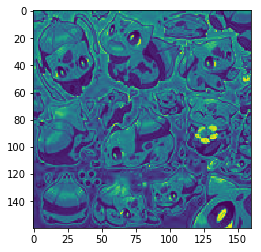

In [0]:
plt.imshow(x_train[33])

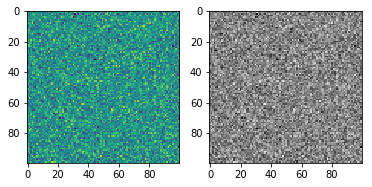

In [0]:
import matplotlib.pyplot as plt
import numpy as np

img2= np.random.randn(100, 100)
plt.subplot(1,2,1)
plt.imshow(img2)  # Colored output
# plt.show()
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')  # Gray output
plt.show()

<class 'numpy.ndarray'>


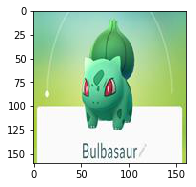

(160, 160, 3)


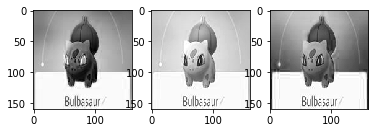

In [0]:
import matplotlib.image as mpimg
plt.subplot(1, 2, 1)
print(type(arr_img))
plt.imshow(arr_img)
plt.show()
# arr_img = mpimg.imread(f_file)
# plt.imshow(arr_img)
# plt.show()
print(arr_img.shape)
# plt.imshow(arr_img[:])#[0:10][:50])
a, b = 15, 30
c = 10
plt.subplot(1, 3, 1)
sliced_img = arr_img[:, :, 0]
plt.imshow(sliced_img, cmap='gray')
plt.subplot(1, 3, 2)
sliced_img = arr_img[:, :, 1]
plt.imshow(sliced_img, cmap='gray')
plt.subplot(1, 3, 3)
sliced_img = arr_img[:, :, 2]
plt.imshow(sliced_img, cmap='gray')
plt.show()
# print(type(arr_img))
# print(arr_img.shape)
# print(arr_img)

# print(arr_img.shape)
# t_arr_img = torch.FloatTensor(arr_img)
# print(t_arr_img.shape)

In [0]:
g_img = arr_img[:, :, 0] * arr_img[:, :, 1] * arr_img[:, :, 2]
print(g_img.shape)
plt.imshow(g_img, cmap='gray')
plt.show()

IndexError: ignored

### Convert a JpegImageFile to a tensor to train a ResNet
l have a jpeg image of (3,224,244). l need to put it in a variable image but it needs to be convert to a tensor (1,3,244,224) to train a Resnet152.
https://discuss.pytorch.org/t/convert-a-jpegimagefile-to-a-tensor-to-train-a-resnet/9101/1

torch.Size([1, 3, 160, 160])


TypeError: ignored

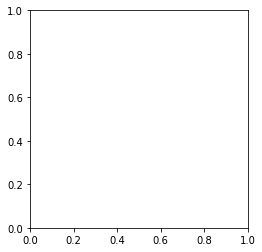

In [0]:
from PIL import Image
from torchvision.transforms import ToTensor

img_path = f_file
image = Image.open(img_path)
# print(image.shape)
image = ToTensor()(image).unsqueeze(0) # unsqueeze to add artificial first dimension
print(image.shape)
plt.imshow(image)
# display(image)
# image = Variable(image)

## model

In [0]:
import torch.nn.init
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
learning_rate = 0.001
training_epochs = 15
# batch_size = 100

In [0]:
# CNN Model (2 conv layers)
class CNN(torch.nn.Module):
# Given groups=1, weight of size 16 3 36 36, expected input[1, 160, 160, 3] to have 3 channels, but got 160 channels instead
    def __init__(self):
        super(CNN, self).__init__()
        # L1 ImgIn shape=(?, 160, 160, 3)    # for 3 channel img
        # L1 ImgIn shape=(?, 160, 160, 1)    # for gray scale img

        #    Conv     -> (?, 32, 32, 16)
        #    Pool     -> (?, 14, 14, 16)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, kernel_size=36, stride=4, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 16)
        #    Conv      ->(?, 14, 14, 32)
        #    Pool      ->(?, 7, 7, 32)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # Final FC 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc(out)
        return out

In [0]:
# instantiate CNN model
model = CNN().to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## training

In [0]:
t_x_train = torch.FloatTensor([[x_case] for x_case in x_train])
print(t_x_train.shape)    # torch.Size([40, 1, 160, 160, 3])
                          # torch.Size([40, 1, 160, 160])

t_y_train = torch.FloatTensor(y_train)
print(len(t_y_train))
print(t_y_train.shape)
# print(len(t_y_train[0]))    # error

data_loader = zip(t_x_train, t_y_train)
idx = 0
for x, y in data_loader:
    idx += 1
    print(idx, x.shape, '  ///   ', y.shape, y)
    if idx == 50:
        break
print(data_loader)

torch.Size([40, 1, 160, 160, 3])
40
torch.Size([40])
1 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
2 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
3 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
4 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
5 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
6 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
7 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
8 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
9 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
10 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
11 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
12 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
13 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
14 torch.Size([1, 160, 160, 3])   ///    torch.Size([]) tensor(0.)
15 torch.Size([1, 

In [0]:
# train my model
# total_batch = len(data_loader)
total_batch = len(t_x_train)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    idx_mini = -1
    # print(data_loader)
    data_loader = zip(t_x_train, t_y_train)
    for X, Y in data_loader:
        idx_mini += 1
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X.view(-1, 3, 160, 160)
        
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        print(X.shape)
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        if idx_mini%3 == 0:
            print(idx_mini)
            plt.imshow(X)
    print('Epoch:', epoch)
    # print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
torch.Size([1, 160, 160, 3])


RuntimeError: ignored

## validation

In [0]:
# Test model and check accuracy
with torch.no_grad():
    # X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    # Y_test = mnist_test.test_labels.to(device)
    X_test = x_test.to(device)
    Y_test = y_test.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

AttributeError: ignored

In [0]:
v_X = X.view(-1, 3, 160, 160)
print(v_X.shape)

print(v_X)


torch.Size([1, 3, 160, 160])
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
          [0.0000, 0.0078, 0.0000,  ..., 0.0000, 0.0157, 0.0000],
          [0.0039, 0.0118, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0078, 0.0000, 0.0235,  ..., 0.3255, 0.5255, 0.3059],
          [0.3098, 0.3922, 0.2157,  ..., 0.5412, 0.5569, 0.6000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0392]],

         [[0.0000, 0.0000, 0.1569,  ..., 0.4118, 0.4784, 0.3020],
          [0.3137, 0.3373, 0.2000,  ..., 0.3373, 0.3490, 0.3843],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1961],
          ...,
          [0.7529, 0.7412, 0.6941,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0196, 0.0157,  ..., 0.7804, 0.8039, 0.7961],
          [0.7765, 0.8000, 0.8549,  ..., 0.3490, 0.8902, 0.8353]],

         [[0.7333, 0.7490, 0.7020,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0118, 0.0157,  ..., 0.8118, 0.8392, 0.8000],
          [0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


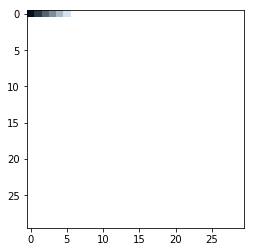

(30, 30, 3)


In [0]:
n = 30
c = 3    # channel number
in_arr = np.linspace(0, n*n*c%255, n*n*c).reshape(n,n,c)
plt.imshow(in_arr)
plt.show()
print(in_arr.shape)
# print(in_arr)
# in_arr.view(-1, )

In [0]:
np.arange(20, lim=255)

TypeError: ignored